# Gerador de Imagens
***

## Importações

In [1]:
import numpy as np
import skimage.morphology as sk
import matplotlib.pyplot as plt

## Funções Auxiliares 

In [2]:
def element_generator(radius=4, state=True):
    ''''
    Gera um furo (elemento) do caractere em braille.
    
    Entrada:
    radius -> tamanho do raio do furo
    state -> tipo de dado booleano que indica o estado do furo

    Saída:
    element -> array do elemento do caractere
    '''

    element = sk.disk(radius)

    if state == True:
        element[0, element.shape[1] // 2] = 0
        element[-1, element.shape[1] // 2] = 0
        element[element.shape[0] // 2, 0] = 0
        element[element.shape[0] // 2, -1] = 0
    else:
        element = np.zeros(element.shape, dtype='uint8')
    
    return element 

In [3]:
def zero_padding(image, width=1):
    '''
    Adiciona zeros na borda de um array.

    Entrada:
    image -> array da imagem.
    widht -> largura da borda em pixels.

    Saída:
    image -> imagem com as bordas adicionadas.
    '''

    image = np.pad(image, pad_width=width, mode='constant')

    return image 

In [4]:
def make_caractere(encoded_image, radius=4, pad_width=1):
    '''
    Gera uma imagem do caractere em braille.

    Entrada:
    encoded_image -> array booleano indicando os pontos de furo.
    radius -> raio do furo.
    pad_width -> largura da borda de zeros em pixels.

    Saída:
    caractere -> array com a imagem do caractere em braille
    '''
    
    caractere = [[np.concatenate((element_generator(radius, encoded_image[0][0]), 
                                  element_generator(radius, encoded_image[0][1])), axis=1)],
                 [np.concatenate((element_generator(radius, encoded_image[1][0]), 
                                  element_generator(radius, encoded_image[1][1])), axis=1)],
                 [np.concatenate((element_generator(radius, encoded_image[2][0]), 
                                  element_generator(radius, encoded_image[2][0])), axis=1)]]

    caractere = np.concatenate((np.squeeze(caractere[0]),np.squeeze(caractere[1]), np.squeeze(caractere[2])))

    caractere = zero_padding(caractere, width=pad_width)

    
    return caractere

In [5]:
def reshape_encoded_image(flatten):
    '''
    Cria uma array com o formato do gabarito de furos em braille.
    
    Entrada:
    flatten -> lista com a codificação dos furos.

    Saída:
    encoded_image -> imagem codificada no formato correto do gabarito.
    '''

    encoded_image = np.array(flatten, dtype='uint8')
    encoded_image = encoded_image.reshape(3,2)
    

    return encoded_image

In [6]:
def caractere_generator(flatten_image, radius=4, pad_width=3):
    '''
    Gera um caractere em braille a partir de um array codificado.

    Entrada:
    flatten_image -> lista codificada como one hot encoder do caractere em braille.
    radius -> raio do furo presente no gabarito.
    pad_width -> largura da borda de zeros presentes no caractere.

    Saída:
    caractere -> array com a imagem do caractere em braille.
    '''

    encoded_image = reshape_encoded_image(flatten_image)
    caractere = make_caractere(encoded_image, radius, pad_width)

    for i in range(0,caractere.shape[0]):
        for j in range(0, caractere.shape[1]):
            if caractere[i][j] == 1:
                caractere[i][j] = 0
            else:
                caractere[i][j] = 1

    return caractere

## Teste da Classe

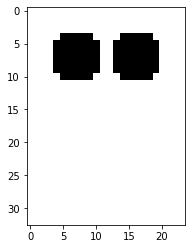

In [7]:
import image_generator as gi
constructor = gi.image_generator()
plt.imshow(constructor.caractere_generator([1,1,0,0,0,0], radius=4, pad_width=3), cmap='gray')